In [48]:
from torchvision import datasets
from voc import VOCSegmentation
import random
import numpy as np

In [109]:
data = VOCSegmentation('/vandal/dataset/', image_set='train', year='2012_aug')
print(len(data))
classes = ['background',
'aeroplane',
'bicycle',
'bird',
'boat',
'bottle',
'bus',
'car',
'cat',
'chair',
'cow',
'diningtable',
'dog',
'horse',
'motorbike',
'person',
'pottedplant',
'sheep',
'sofa',
'train',
'tvmonitor']
classes = {i:classes[i] for i in range(len(classes))}
classes[255] = 'none'


10582


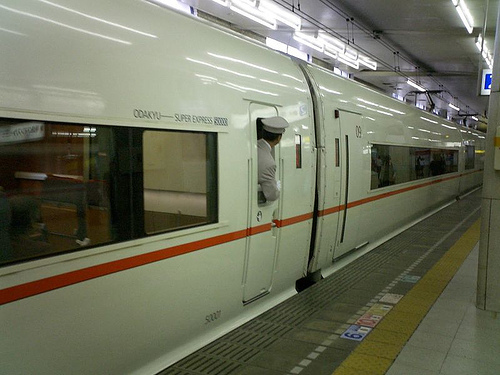

In [169]:
idx = random.randint(0, len(data))

data[idx][0]

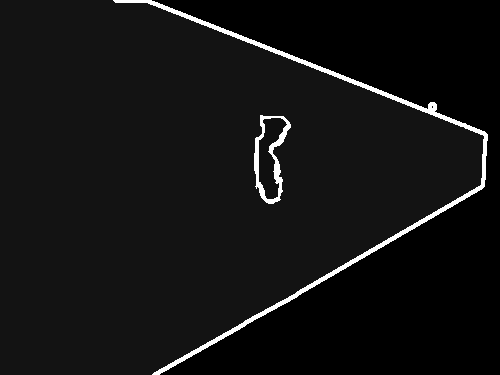

In [170]:
pic = data[idx][1]
pic

In [227]:
cm = np.zeros((21,21))

cls = np.unique(np.array((pic)))
if cls[-1]==255:
    cls = cls[:-1]

for cl in cls:
    print(classes[cl])

for cl in cls:
    cm[cl, cls] += 1

background
aeroplane
person


In [190]:
cm = np.zeros((21,21))

for idx in range(len(data)):
    pic = data[idx][1]
    cls = np.unique(np.array((pic)))
    if cls[-1]==255:
        cls = cls[:-1]
    for cl in cls:
        cm[cl, cls] += 1

cm_full = cm

In [224]:
#np.savetxt('datasets/data/voc_correlations.csv', cm, delimiter=',')

cm_full = np.genfromtxt('datasets/data/voc_correlations.csv', delimiter=',')

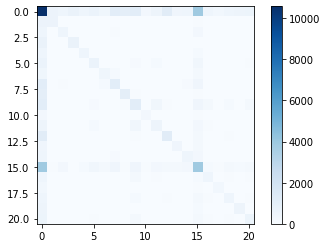

In [229]:
import matplotlib.pyplot as plt

cm = cm_full

# normalize
# cm[range(21), range(21)] = 0 # exclude diag
# cm[0, :] = 0 # exclude background
# cm[:, 0] = 0 # exclude background

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)


In [236]:
idx = 8
{f"{i}-{classes[i]}":int(cm[idx,i]) for i in range(21)}

{'0-background': 997,
 '1-aeroplane': 0,
 '2-bicycle': 2,
 '3-bird': 2,
 '4-boat': 0,
 '5-bottle': 16,
 '6-bus': 0,
 '7-car': 6,
 '8-cat': 1000,
 '9-chair': 51,
 '10-cow': 0,
 '11-diningtable': 15,
 '12-dog': 31,
 '13-horse': 0,
 '14-motorbike': 0,
 '15-person': 56,
 '16-pottedplant': 26,
 '17-sheep': 1,
 '18-sofa': 30,
 '19-train': 0,
 '20-tvmonitor': 21}